In [1]:
# | echo: false
%load_ext autoreload
%autoreload 2

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from jaxcmr_research.state_analysis import matrix_heatmap, instance_memory_heatmap
from jax import numpy as jnp, lax

# from jaxcmr_research.models.cmr.no_reinstate_cmr import BaseCMR, InstanceCMR
from jaxcmr_research.models.cmr.cmr import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.weirdcmr import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.flexcmr import BaseCMR, InstanceCMR

# from jaxcmr_research.models.cmr._cmr import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.trace_reinstatement_cmr import CMR as InstanceCMR
# from jaxcmr_research.models.cmr.weirdcmrde import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.contextcmrde import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.multicontextcmrde import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.mcf_multiplex_cmr import BaseCMR, InstanceCMR
# from jaxcmr_research.models.cmr.contextcmrde3 import BaseCMR, InstanceCMR
from jaxcmr_research.models.cmr.item_positional_cmr import BaseCMR, InstanceCMR
import json
from jaxcmr_research.helpers.math import power_scale

fit_result_path = (
    # "results/icmr/Model_Fitting/HealyKahana2014_ScaleFreeBaseCMR_Model_Fitting.json"
    "notebooks/Model_Fitting//fits//LohnasKahana2014_ConnectionistCMR_Model_Fitting.json"
    # "notebooks/Model_Fitting/fits/KahanaJacobs2000_BaseCMR_Model_Fitting.json"
)

with open(fit_result_path, "r") as f:
    fit_result = json.load(f)

base_params = {key: jnp.array(value[2]) for key, value in fit_result["fits"].items()}
choice_sensitivity = base_params["choice_sensitivity"]
base_params["choice_sensitivity"] = jnp.array(1.0, dtype=jnp.float32)
base_params["mfc_trace_sensitivity"] = jnp.array(0.1, dtype=jnp.float32)
base_params["positional_scale"] = jnp.array(1.0, dtype=jnp.float32)
base_params

{'encoding_drift_rate': Array(0.7979755, dtype=float32, weak_type=True),
 'start_drift_rate': Array(0.11902849, dtype=float32, weak_type=True),
 'recall_drift_rate': Array(0.9213753, dtype=float32, weak_type=True),
 'shared_support': Array(0.05847341, dtype=float32, weak_type=True),
 'item_support': Array(0.6875884, dtype=float32, weak_type=True),
 'learning_rate': Array(0.3528511, dtype=float32, weak_type=True),
 'primacy_scale': Array(7.2920995, dtype=float32, weak_type=True),
 'primacy_decay': Array(0.53475994, dtype=float32, weak_type=True),
 'stop_probability_scale': Array(0.00748838, dtype=float32, weak_type=True),
 'stop_probability_growth': Array(0.14557873, dtype=float32, weak_type=True),
 'choice_sensitivity': Array(1., dtype=float32),
 'mcf_trace_sensitivity': Array(1., dtype=float32, weak_type=True),
 'mfc_trace_sensitivity': Array(0.1, dtype=float32),
 'mfc_choice_sensitivity': Array(1., dtype=float32, weak_type=True),
 'semantic_scale': Array(0., dtype=float32, weak_type=

## Memory Array Visualization

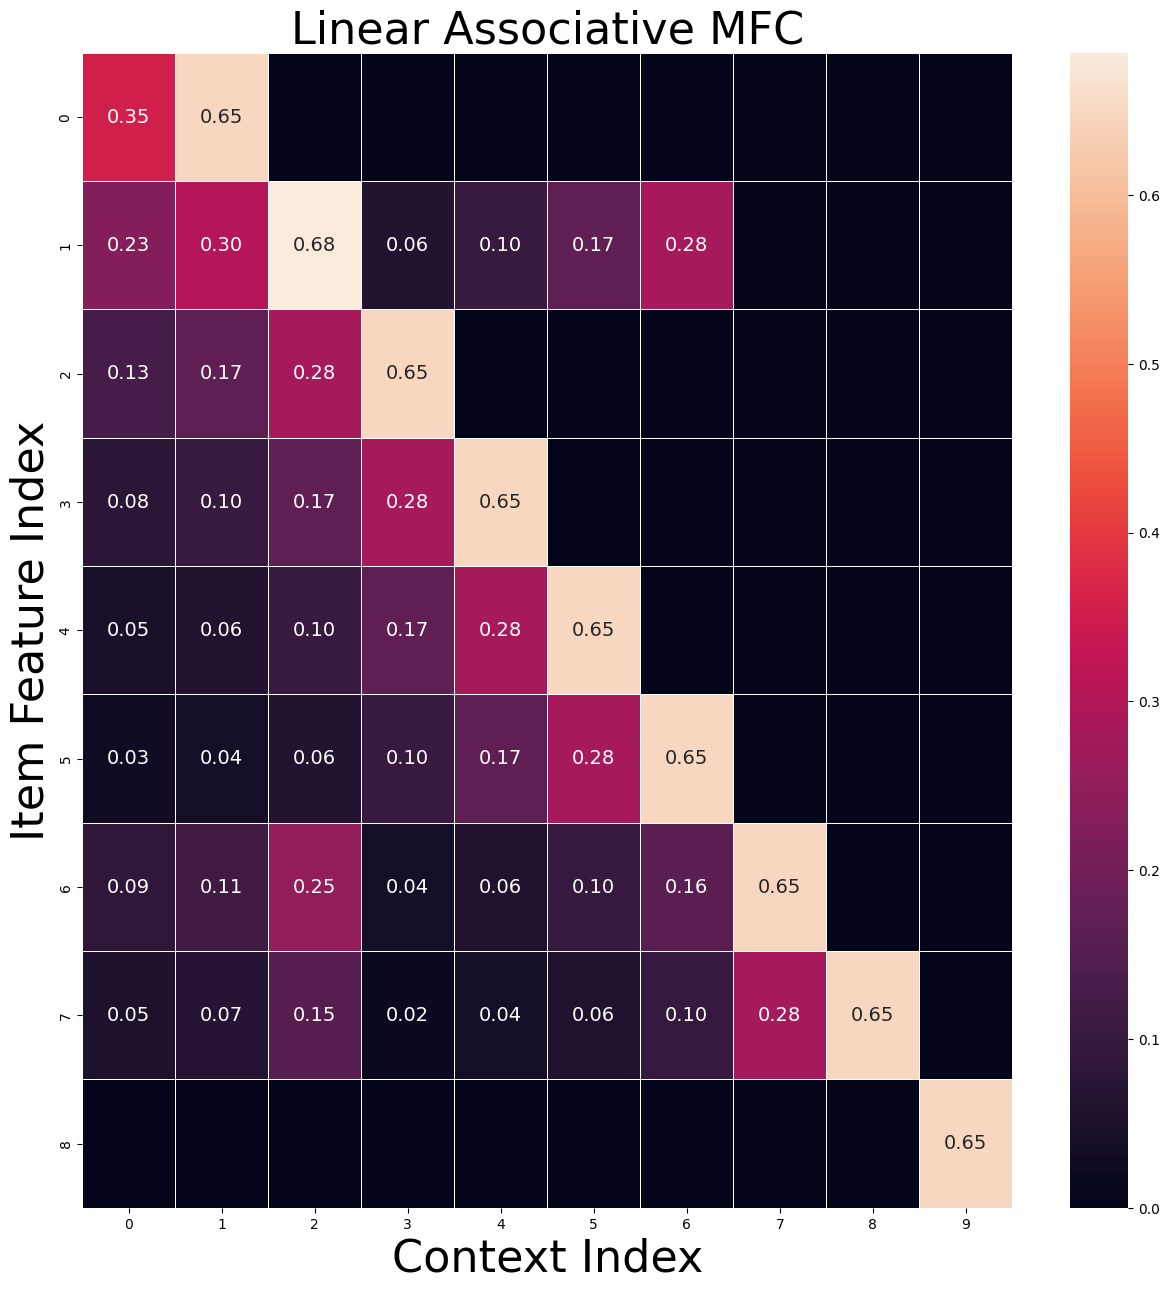

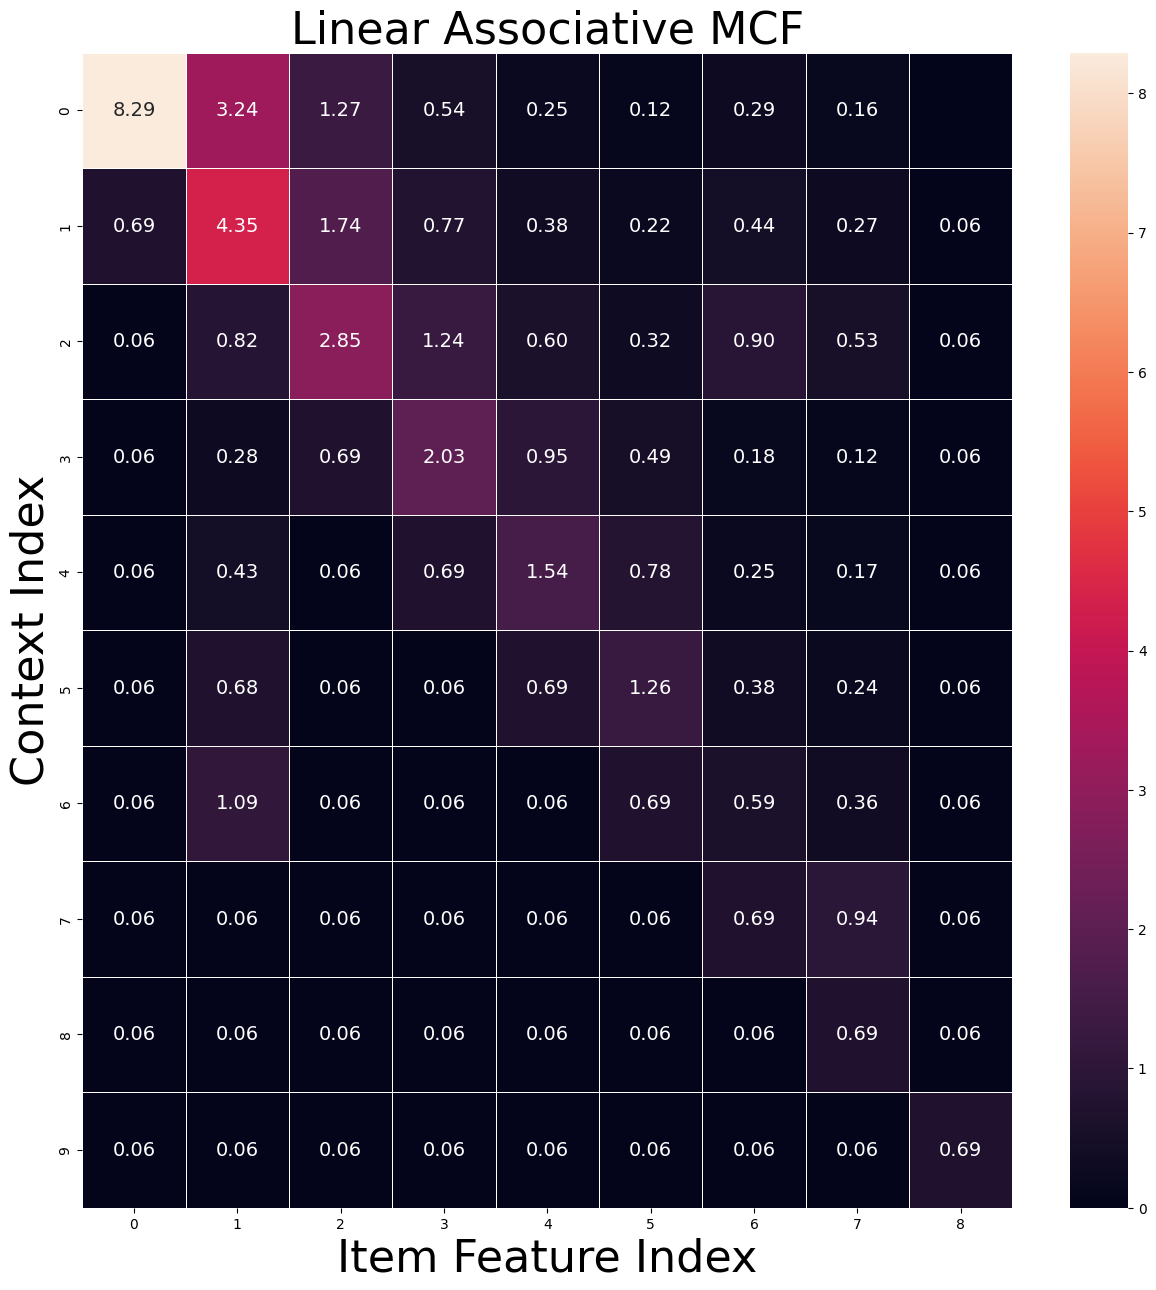

In [3]:
# | code-summary: linear memory using the model and a study list with one item repetition (positions 2, 7; item 2)
model_create_fn = BaseCMR
list_length = 9
item_count = 8
parameters = base_params

present = jnp.array([1, 2, 3, 4, 5, 6, 2, 7, 8])
model = model_create_fn(list_length, parameters)
model = lax.fori_loop(0, list_length, lambda i, m: m.experience(present[i]), model)
model = model.start_retrieving()

matrix_heatmap(model.item_mfc.state, title="Linear Associative MFC")
plt.xlabel("Context Index")
plt.ylabel("Item Feature Index")
plt.show()

matrix_heatmap(model.item_mcf.state, title="Linear Associative MCF")
plt.xlabel("Item Feature Index")
plt.ylabel("Context Index")
plt.show()

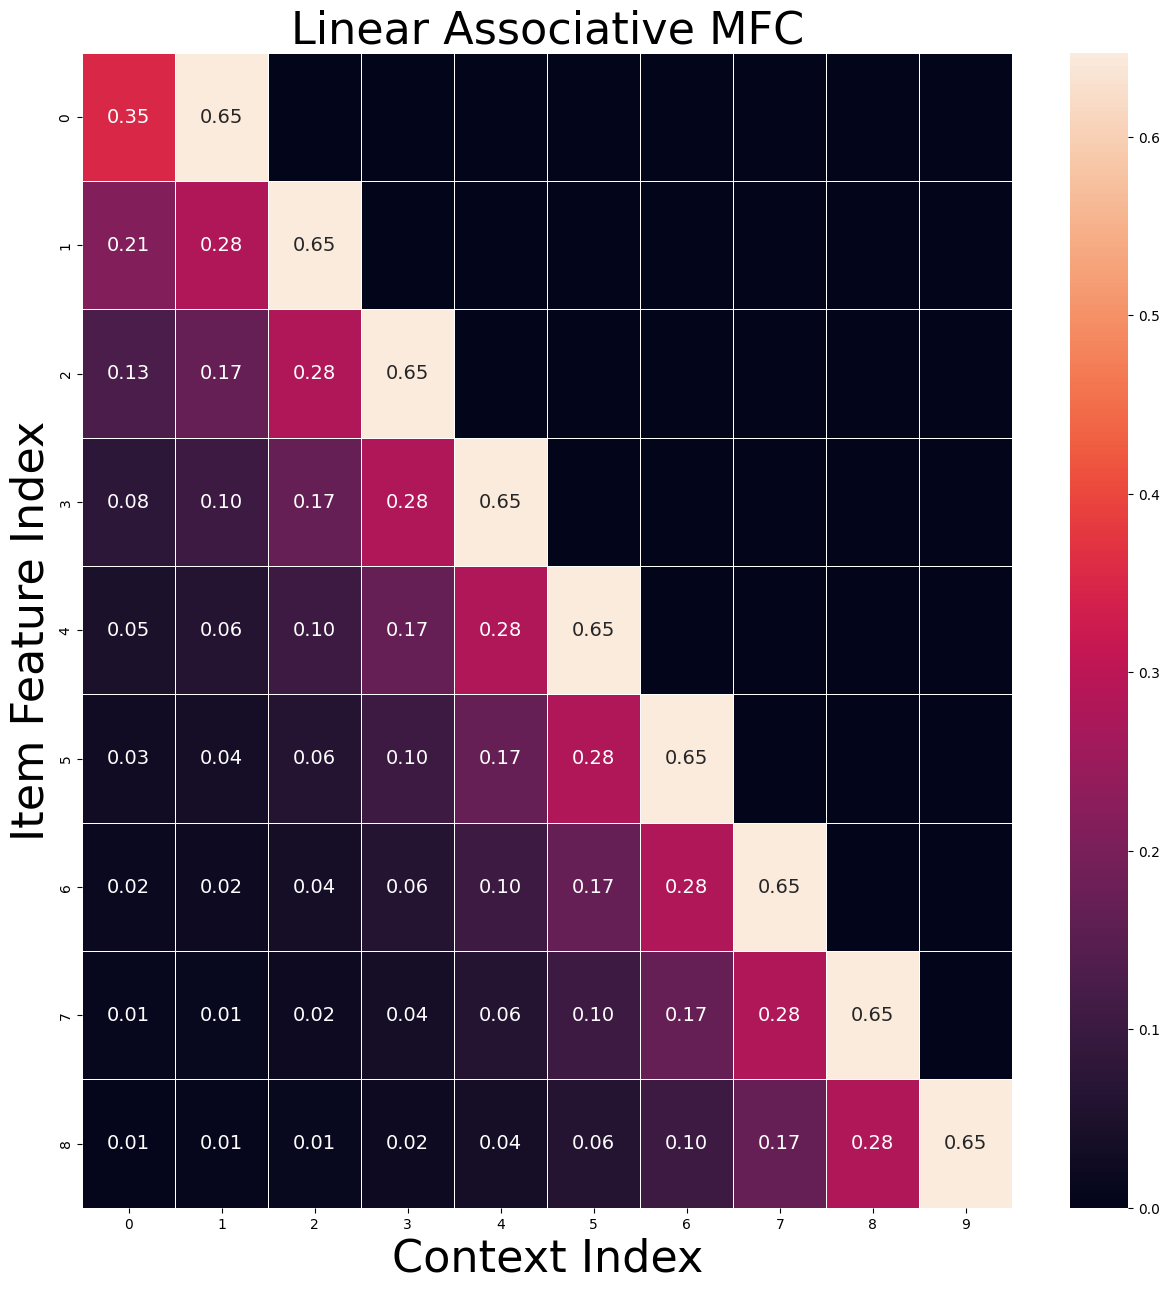

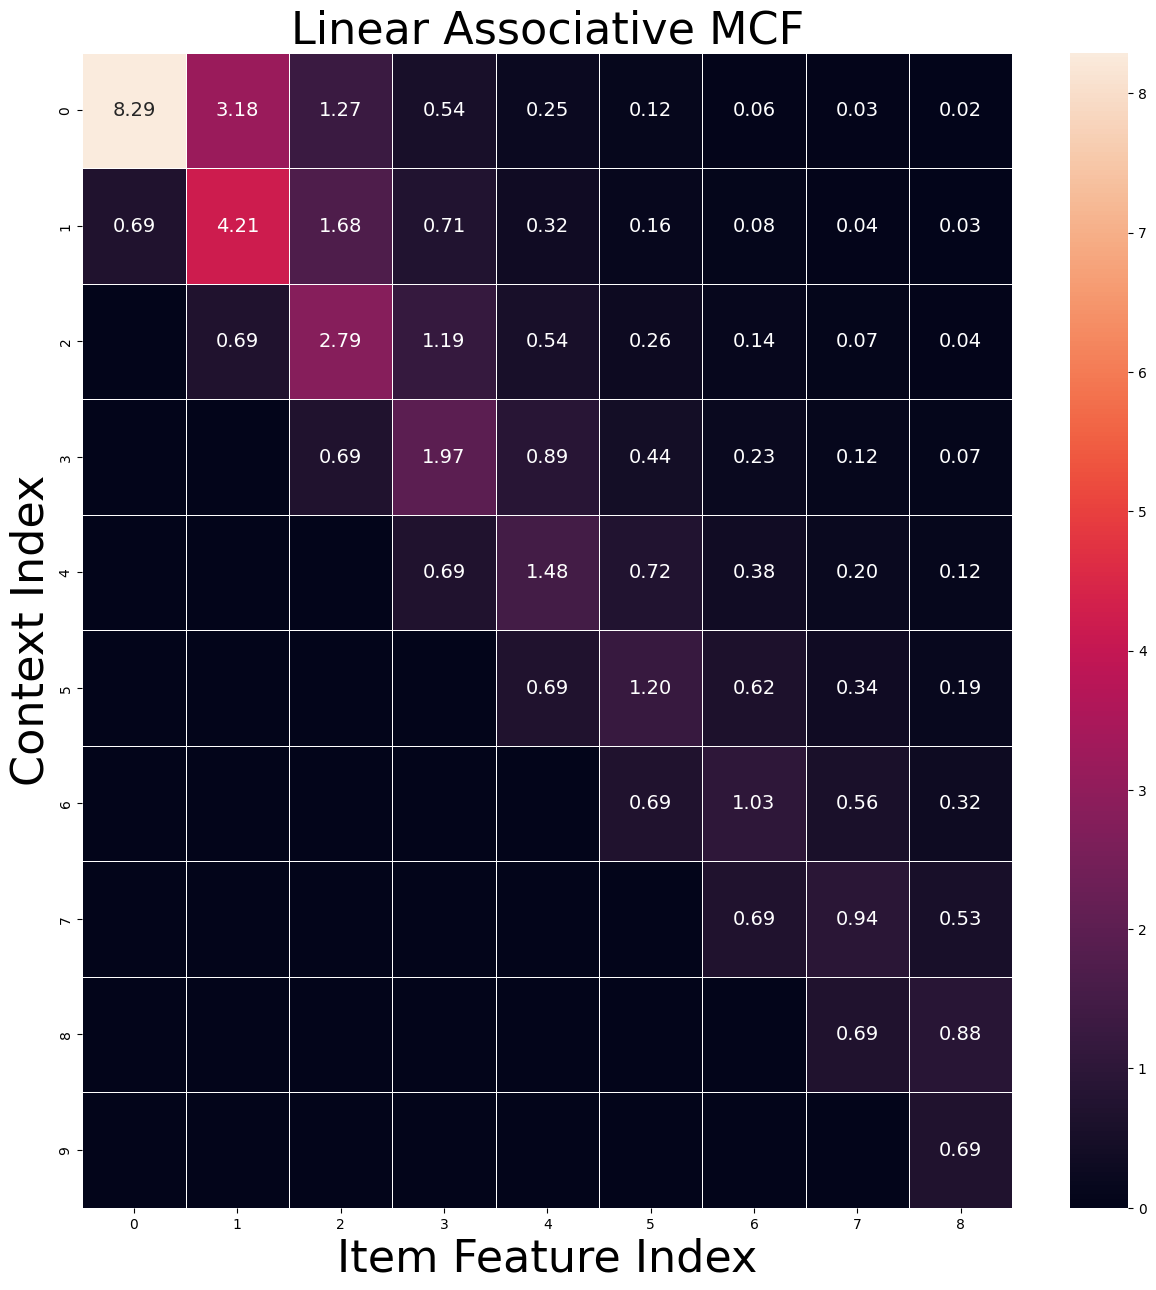

In [4]:
# | code-summary: linear memory using the model and a study list with one item repetition (positions 2, 7; item 2)
model_create_fn = BaseCMR
list_length = 9
item_count = 8
parameters = base_params

present = jnp.array([1, 2, 3, 4, 5, 6, 2, 7, 8])
model = model_create_fn(list_length, parameters)
model = lax.fori_loop(0, list_length, lambda i, m: m.experience(present[i]), model)
model = model.start_retrieving()

matrix_heatmap(model.position_mfc.state, title="Linear Associative MFC")
plt.xlabel("Context Index")
plt.ylabel("Item Feature Index")
plt.show()

matrix_heatmap(model.position_mcf.state, title="Linear Associative MCF")
plt.xlabel("Item Feature Index")
plt.ylabel("Context Index")
plt.show()

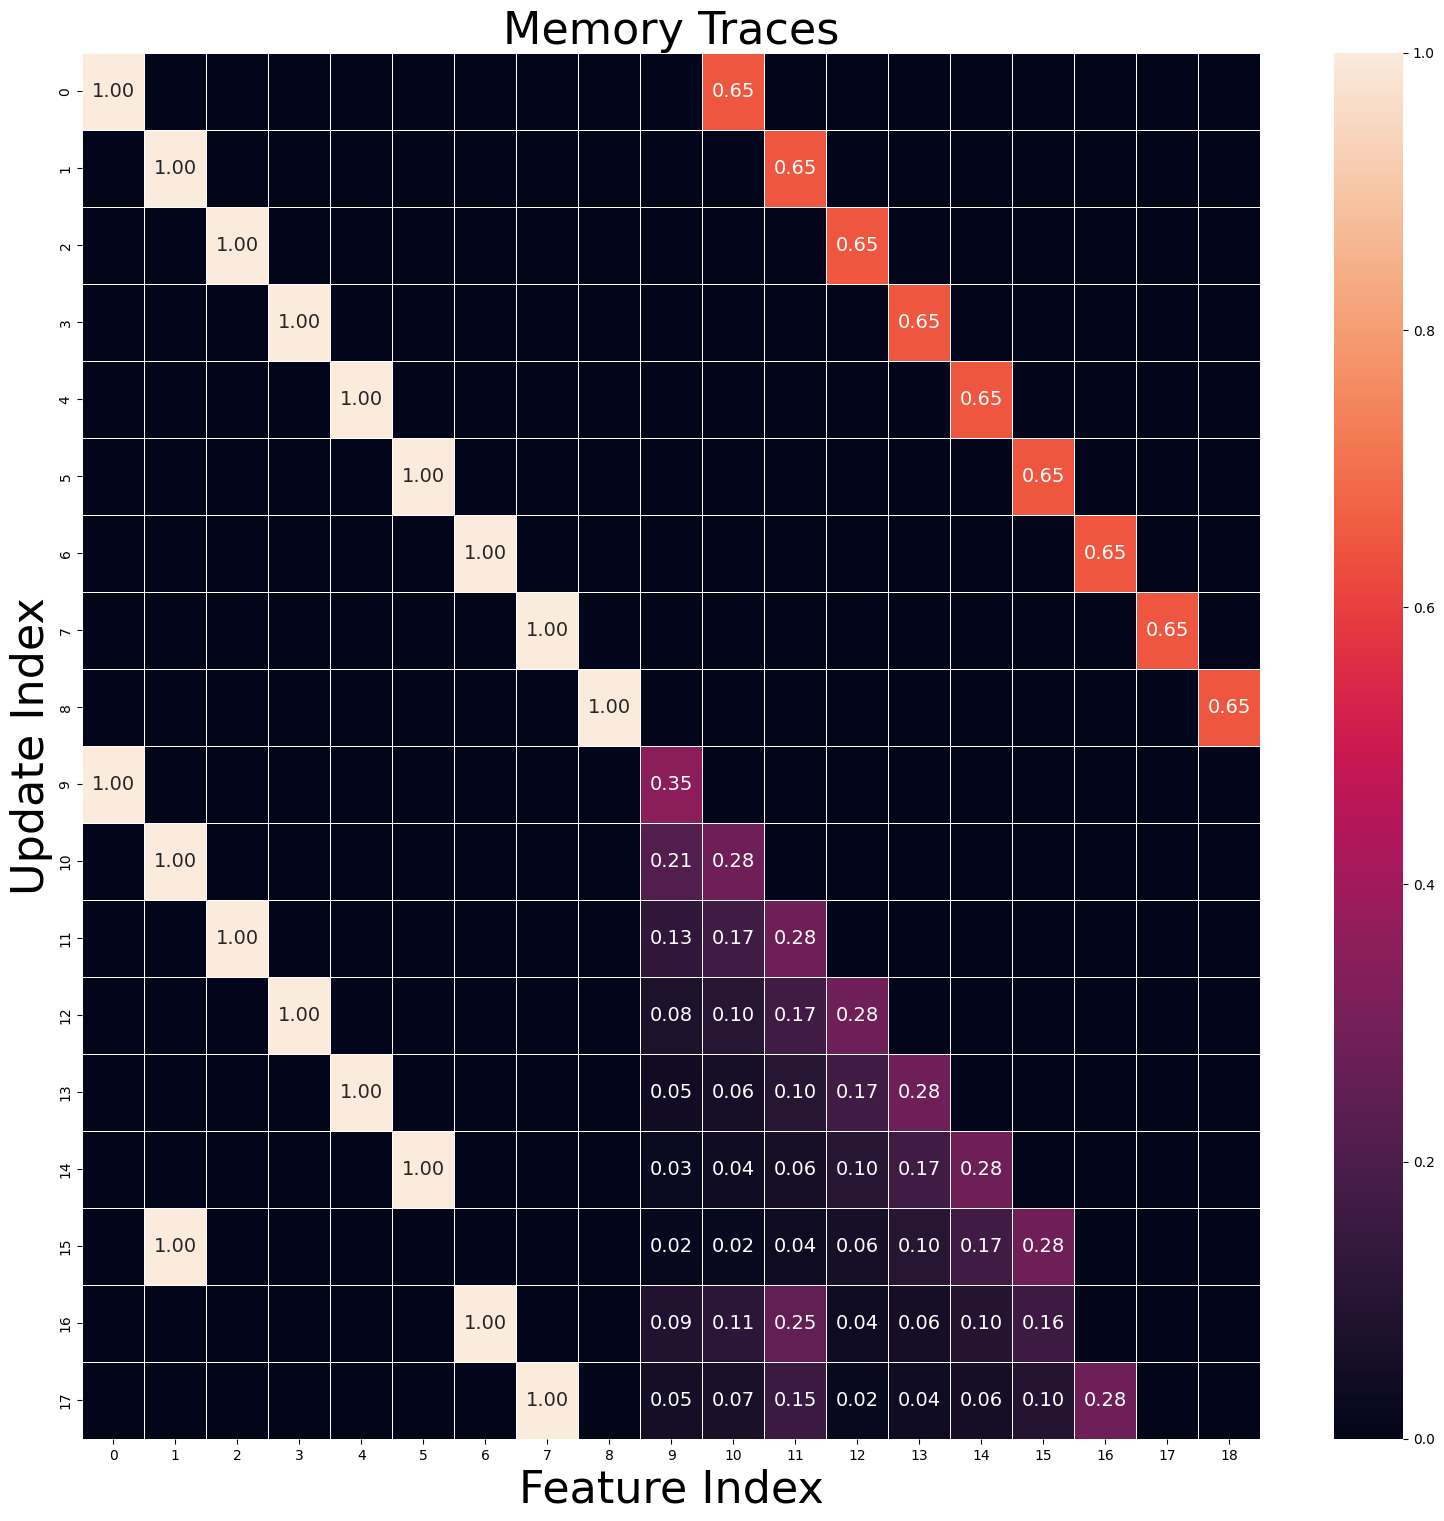

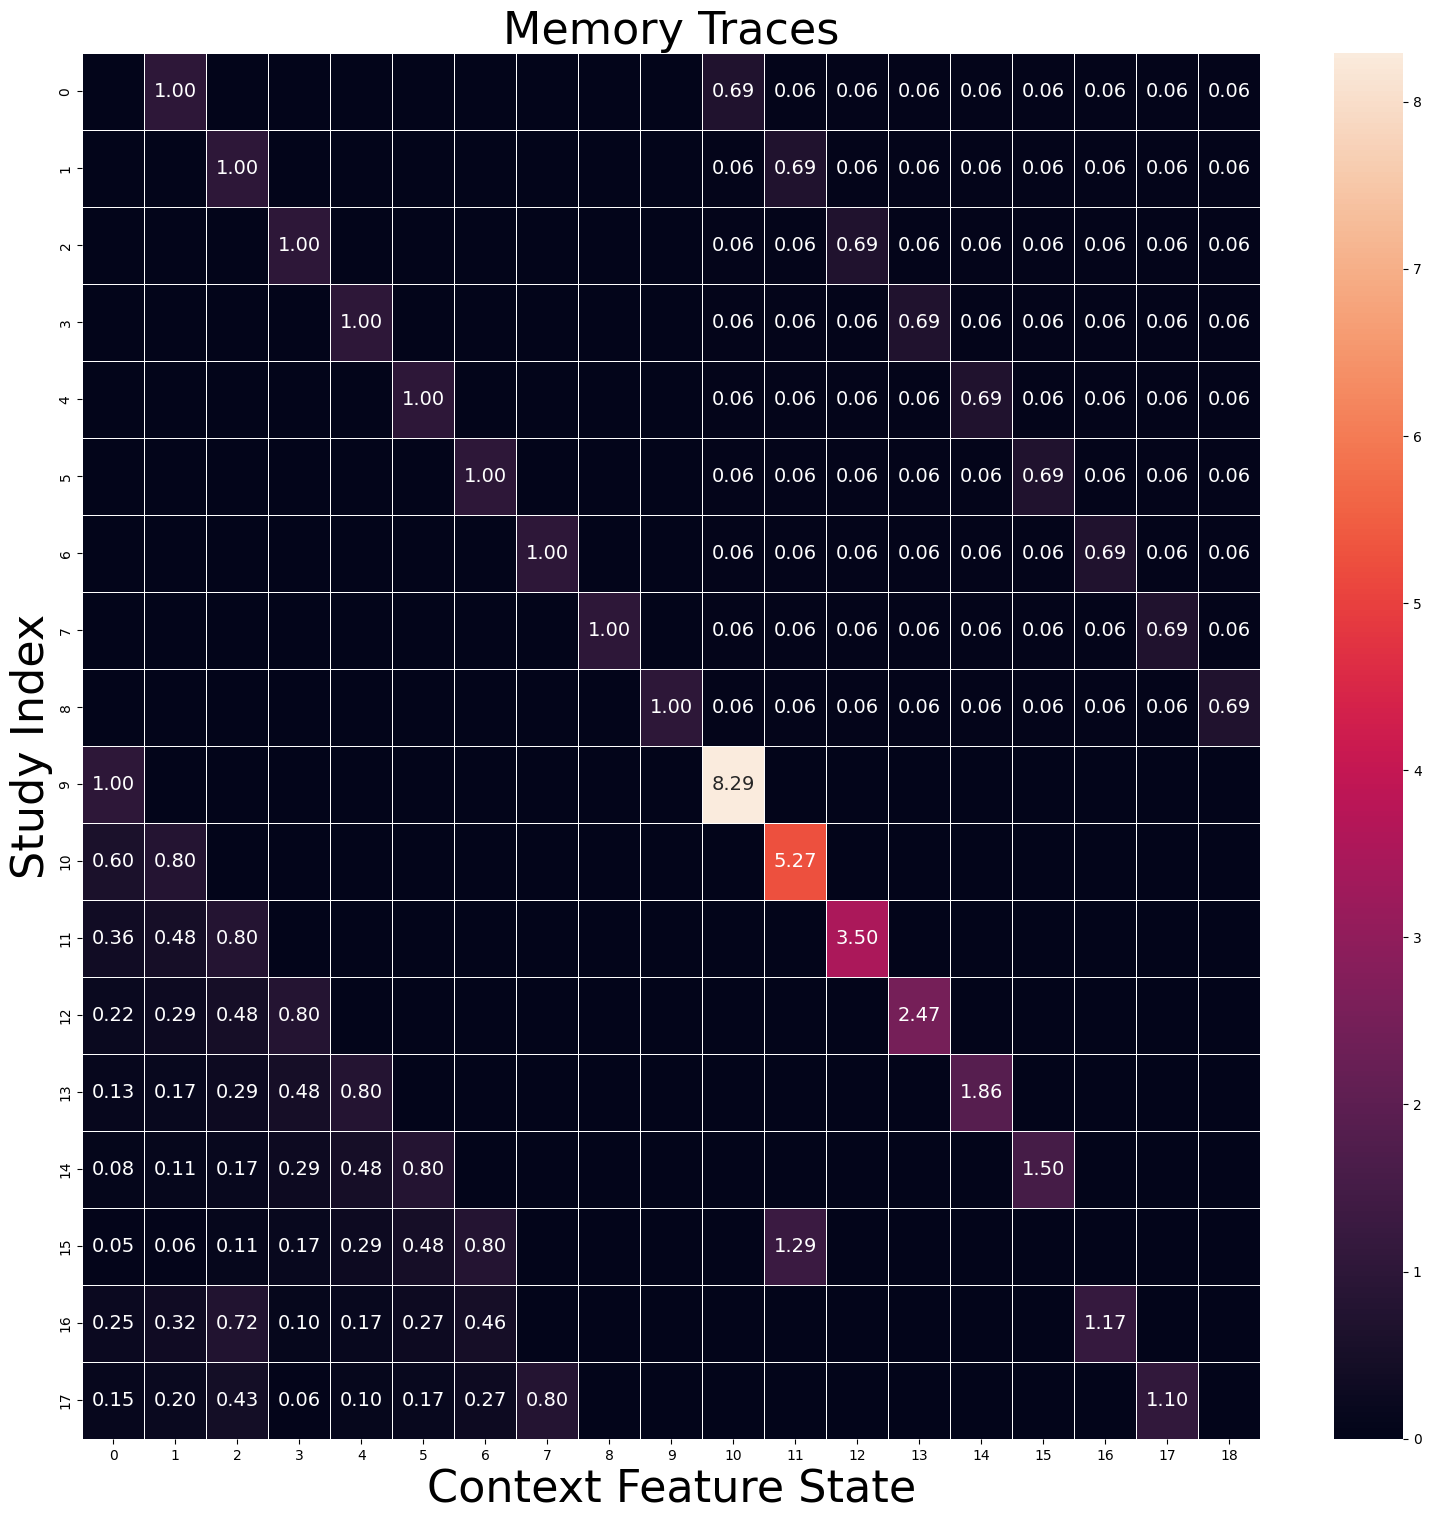

In [5]:
# | code-summary: instance memory using the model and a study list with one item repetition (positions 2, 7; item 2)

model_create_fn = InstanceCMR
list_length = 9
item_count = 8

present = jnp.array([1, 2, 3, 4, 5, 6, 2, 7, 8])
model = model_create_fn(list_length, parameters)
model = lax.fori_loop(0, list_length, lambda i, m: m.experience(present[i]), model)
model = model.start_retrieving()

instance_memory_heatmap(
    model.item_mfc.state,
    list_length,
    include_inputs=True,
    include_outputs=True,
    include_preexperimental=True,
)
plt.show()


instance_memory_heatmap(
    model.item_mcf.state,
    list_length,
    include_inputs=True,
    include_outputs=True,
    include_preexperimental=True,
)
plt.ylabel("Study Index")
plt.xlabel("Context Feature State")
plt.savefig("context_states.pdf", bbox_inches="tight")
plt.show()


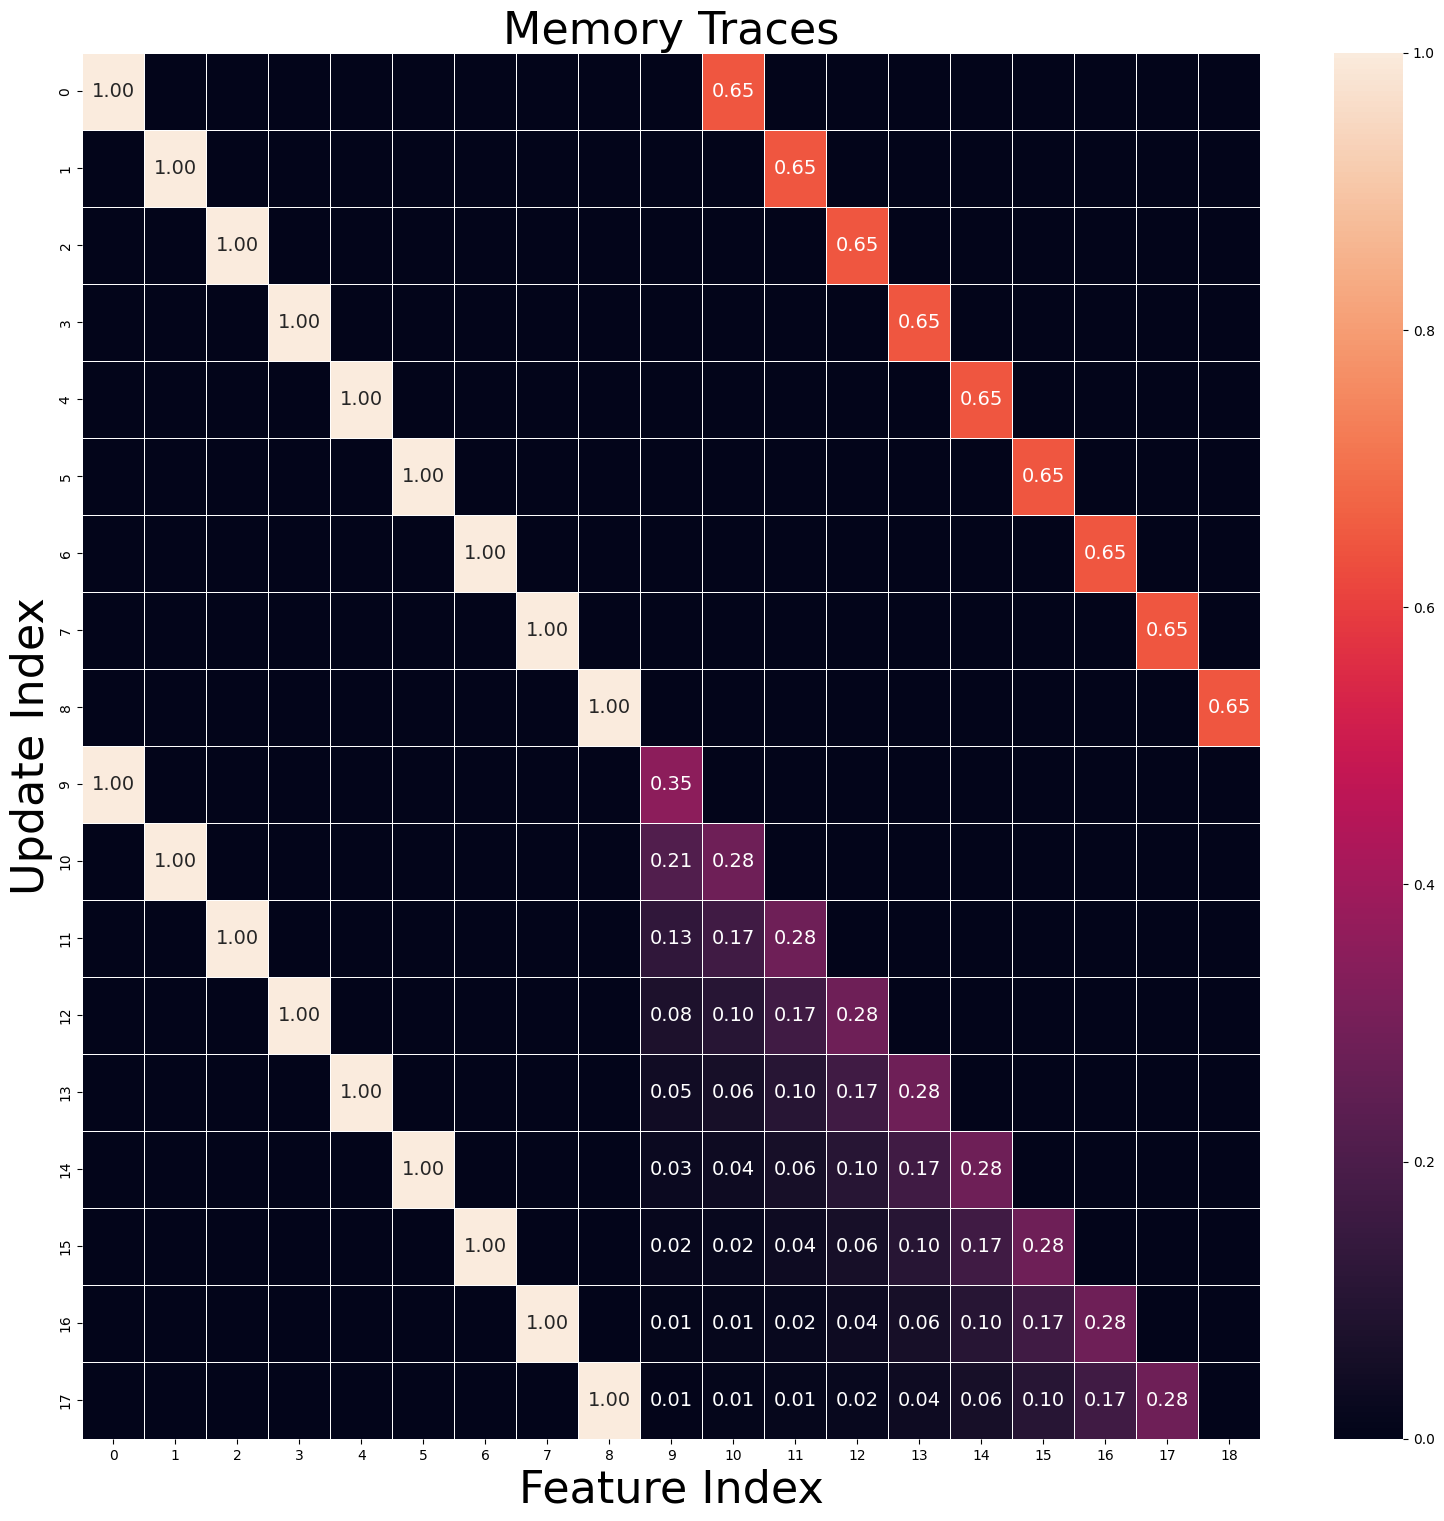

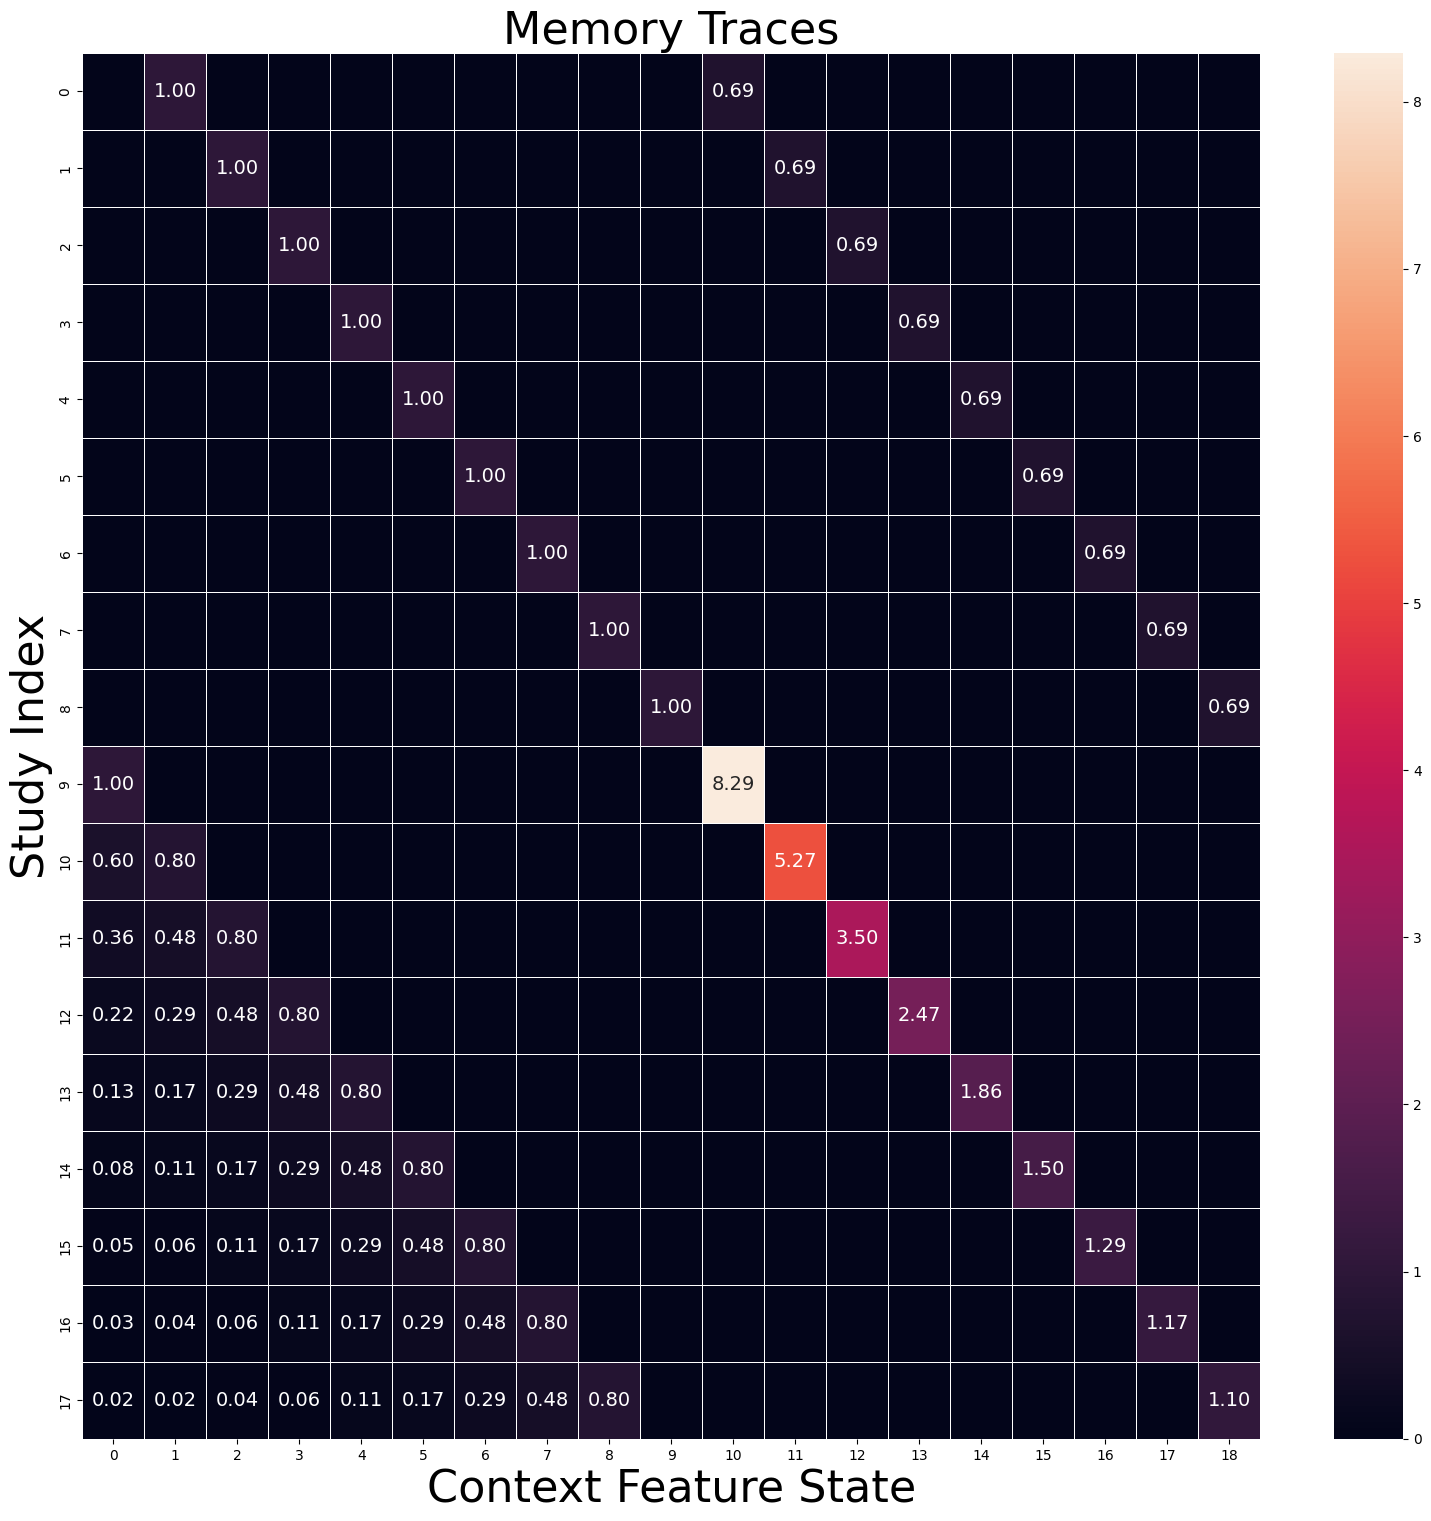

In [6]:
# | code-summary: instance memory using the model and a study list with one item repetition (positions 2, 7; item 2)

model_create_fn = InstanceCMR
list_length = 9
item_count = 8

present = jnp.array([1, 2, 3, 4, 5, 6, 2, 7, 8])
model = model_create_fn(list_length, parameters)
model = lax.fori_loop(0, list_length, lambda i, m: m.experience(present[i]), model)
model = model.start_retrieving()

instance_memory_heatmap(
    model.position_mfc.state,
    list_length,
    include_inputs=True,
    include_outputs=True,
    include_preexperimental=True,
)
plt.show()


instance_memory_heatmap(
    model.position_mcf.state,
    list_length,
    include_inputs=True,
    include_outputs=True,
    include_preexperimental=True,
)
plt.ylabel("Study Index")
plt.xlabel("Context Feature State")
plt.savefig("context_states.pdf", bbox_inches="tight")
plt.show()


In [7]:
# | code-summary: setup an analysis of recall activations/probabilities in the model as fn of parameter manipulation

from jaxcmr_research.helpers.math import linalg_norm

# parametrization
model_create_fn = InstanceCMR
list_length = 9
item_count = 8

# study events and set up for recall
present = jnp.array([1, 2, 3, 4, 5, 6, 2, 7, 8])
model = model_create_fn(list_length, parameters)
model = lax.fori_loop(0, list_length, lambda i, m: m.experience(present[i]), model)
model = model.start_retrieving()

# simulate retrieval of repeated item
item_index = 2
first_encoding_index = 1
second_encoding_index = 6  #! normally 6, but when we multiplex traces is 7

# model = model.retrieve(6)
print(model.item_context.state)
print(model.position_context.state)
print()

# model = model.retrieve(1)
model = model.retrieve(item_index)

print(model.item_context.state)
print(model.position_context.state)
print()

print(model.outcome_probabilities())
print(jnp.round(model.outcome_probabilities(), 2))
print(len(model.outcome_probabilities() * 100))
print()

print(model.recalls)

[0.20437592 0.11566021 0.2560339  0.0356207  0.05910286 0.09806509
 0.16271237 0.4726569  0.78424555 0.        ]
[0.12927252 0.01377544 0.0228566  0.03792432 0.06292508 0.10440704
 0.17323507 0.28743643 0.47692257 0.79132324]

[0.28911448 0.33562768 0.7286734  0.07307698 0.12103061 0.19982931
 0.32730347 0.16786362 0.27852398 0.        ]
[0.22716929 0.24767873 0.5544669  0.06290002 0.10416146 0.1719117
 0.28125668 0.5867466  0.17265663 0.2864767 ]

[0.00866187 0.22912148 0.         0.2603024  0.13209102 0.08783062
 0.08072246 0.11018024 0.09108991 0.        ]
[0.01       0.22999999 0.         0.26       0.13       0.09
 0.08       0.11       0.09       0.        ]
10

[2 0 0 0 0 0 0 0 0]


[0.26764998 0.35437477 0.7978061  0.07186452 0.1192396  0.19784567
 0.32827103 0.         0.         0.        ]
[0.4427862  0.5862591  0.07165315 0.11888891 0.19726378 0.32730556
 0.5430745  0.         0.         0.        ]
[0.60269   0.7979754 0.        0.        0.        0.        0.
 0.        0.        0.       ]
[0.04792519 0.06345405 0.10528474 0.17469136 0.28985277 0.4809318
 0.7979754  0.         0.         0.        ]
[0.6339598  0.         0.89154077 0.36640093 0.20997362 0.18113028
 0.2552994  0.13290246 0.        ]
2.671207
[0.79017043 0.         0.29458183 0.16050683 0.13380039 0.1591422
 0.12009934 0.06398188 0.        ]
1.722283
[1.         0.         0.2950648  0.1011267  0.0392931  0.01771995
 0.04723966 0.02465205 0.        ]
1.5250962
[0.20205978 0.         0.26831186 0.34682256 0.4899666  0.7533467
 0.38071647 0.20525166 0.        ]
2.6464758
[[0.23733084 0.         0.33375952 0.13716681 0.07860627 0.0678084
  0.09557454 0.04975371]
 [0.45879245 0.         0.1710

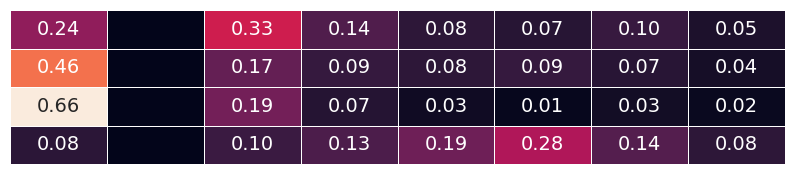

In [8]:
# |code-summary: construct probes to MCF: one for the item, one for a combination of both contexts paired with each item, and one for each context associated with each item in the pair

item_inputs = []

# mcf_in_pattern = model.item_mfc.full_probe(model.items[1], model.context.state)
mcf_in_pattern = model.item_mfc.probe(model.items[1])
mcf_in_pattern = linalg_norm(mcf_in_pattern)
item_inputs.append(mcf_in_pattern)

mcf_in_pattern = (
    model.item_mcf.state[list_length + first_encoding_index][
        : model.item_mcf.input_size
    ]
    + model.item_mcf.state[list_length + second_encoding_index][
        : model.item_mcf.input_size
    ]
)

mcf_in_pattern = linalg_norm(mcf_in_pattern)
item_inputs.append(mcf_in_pattern)

mcf_in_pattern = model.item_mcf.state[list_length + first_encoding_index][
    : model.item_mcf.input_size
]
mcf_in_pattern = linalg_norm(mcf_in_pattern)
item_inputs.append(mcf_in_pattern)

mcf_in_pattern = model.item_mcf.state[list_length + second_encoding_index][
    : model.item_mcf.input_size
]
mcf_in_pattern = linalg_norm(mcf_in_pattern)
item_inputs.append(mcf_in_pattern)

for mcf_in_pattern in item_inputs:
    print(mcf_in_pattern)

activations = []

for mcf_in_pattern in item_inputs:
    activation = (
        power_scale(model.item_mcf.probe(mcf_in_pattern), choice_sensitivity)
        * model.recallable
    )
    print(activation)
    print(activation.sum())
    activation = activation / activation.sum()
    activations.append(activation[:8])

recall_supports = jnp.array(activations)

print(recall_supports)
matrix_heatmap(recall_supports, figsize=(10, 2))
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])

# remove the colorbar
axis = plt.gca()
# remove the colorbar
cax = axis.collections[0].colorbar
cax.remove()

[0.28851163 0.38199604 0.87797487 0.         0.         0.
 0.         0.         0.         0.        ]
[0.4427862  0.5862591  0.07165315 0.11888891 0.19726378 0.32730556
 0.5430745  0.         0.         0.        ]
[0.60269   0.7979754 0.        0.        0.        0.        0.
 0.        0.        0.       ]
[0.04792519 0.06345405 0.10528474 0.17469136 0.28985277 0.4809318
 0.7979754  0.         0.         0.        ]
[0.7089577  0.         1.         0.3301515  0.11904923 0.04700976
 0.02014267 0.00920943 0.        ]
2.2345202
[1.         0.         0.35599568 0.18672702 0.15460858 0.18939166
 0.15247375 0.06971255 0.        ]
2.1089094
[1.         0.         0.28684157 0.09470117 0.03414826 0.01348435
 0.00577775 0.00264165 0.        ]
1.4375948
[0.2137979  0.         0.30615637 0.4167918  0.6207267  1.
 0.8602698  0.39332408 0.        ]
3.8110666
[[0.31727514 0.         0.44752336 0.14775051 0.05327731 0.02103797
  0.00901431 0.00412144]
 [0.47417873 0.         0.16880558 0.0885

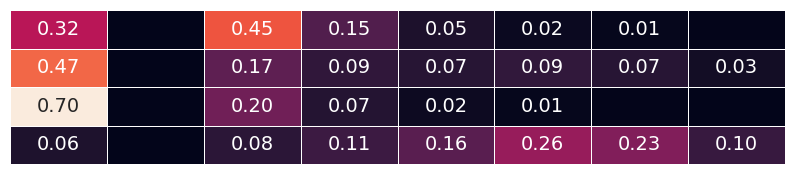

In [9]:
# |code-summary: construct probes to MCF: one for the item, one for a combination of both contexts paired with each item, and one for each context associated with each item in the pair

position_inputs = []

# mcf_in_pattern = model.item_mfc.full_probe(model.items[1], model.context.state)
mcf_in_pattern = model.position_mfc.probe(model.items[1])
mcf_in_pattern = linalg_norm(mcf_in_pattern)
position_inputs.append(mcf_in_pattern)

mcf_in_pattern = (
    model.position_mcf.state[list_length + first_encoding_index][
        : model.position_mcf.input_size
    ]
    + model.position_mcf.state[list_length + second_encoding_index][
        : model.position_mcf.input_size
    ]
)

mcf_in_pattern = linalg_norm(mcf_in_pattern)
position_inputs.append(mcf_in_pattern)

mcf_in_pattern = model.position_mcf.state[list_length + first_encoding_index][
    : model.position_mcf.input_size
]
mcf_in_pattern = linalg_norm(mcf_in_pattern)
position_inputs.append(mcf_in_pattern)

mcf_in_pattern = model.position_mcf.state[list_length + second_encoding_index][
    : model.position_mcf.input_size
]
mcf_in_pattern = linalg_norm(mcf_in_pattern)
position_inputs.append(mcf_in_pattern)

for mcf_in_pattern in position_inputs:
    print(mcf_in_pattern)

activations = []

for mcf_in_pattern in position_inputs:
    activation = (
        power_scale(model.position_mcf.probe(mcf_in_pattern), choice_sensitivity)
        * model.recallable
    )
    print(activation)
    print(activation.sum())
    activation = activation / activation.sum()
    activations.append(activation[:8])

recall_supports = jnp.array(activations)

print(recall_supports)
matrix_heatmap(recall_supports, figsize=(10, 2))
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])

# remove the colorbar
axis = plt.gca()
# remove the colorbar
cax = axis.collections[0].colorbar
cax.remove()

[1.6831778  0.         3.0885875  0.53862095 0.14022513 0.05895235
 0.04313641 0.01225787 0.        ]
5.564958
[3.2197325  0.         0.53992313 0.17858543 0.12864722 0.1790185
 0.11423857 0.03322133 0.        ]
4.393367
[5.5462437e+00 0.0000000e+00 6.2285036e-01 9.0581633e-02 1.5989138e-02
 3.5141495e-03 4.8634969e-03 1.3854242e-03 0.0000000e+00]
6.2854276
[0.08911455 0.         0.15621889 0.2563516  0.4928357  1.0957949
 0.49291688 0.14505963 0.        ]
2.728292
[[3.02460104e-01 0.00000000e+00 5.55006444e-01 9.67879593e-02
  2.51978766e-02 1.05934935e-02 7.75143551e-03 2.20268918e-03]
 [7.32862234e-01 0.00000000e+00 1.22895069e-01 4.06488776e-02
  2.92821489e-02 4.07474488e-02 2.60025114e-02 7.56170182e-03]
 [8.82397175e-01 0.00000000e+00 9.90943462e-02 1.44113721e-02
  2.54384242e-03 5.59094711e-04 7.73773412e-04 2.20418442e-04]
 [3.26631293e-02 0.00000000e+00 5.72588593e-02 9.39604640e-02
  1.80638909e-01 4.01641369e-01 1.80668667e-01 5.31686619e-02]]


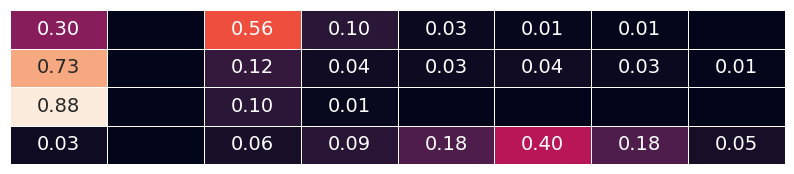

In [10]:
activations = []

for i in range(len(position_inputs)):
    position_mcf_in_pattern = position_inputs[i]
    item_mcf_in_pattern = item_inputs[i]
    item_activation = model.item_mcf.probe(item_mcf_in_pattern)
    position_activation = model.position_mcf.probe(position_mcf_in_pattern)
    activation = (
        power_scale(item_activation, choice_sensitivity)
        * power_scale(position_activation, model.positional_scale)
    ) * model.recallable
    print(activation)
    print(activation.sum())
    activation = activation / activation.sum()
    activations.append(activation[:8])

recall_supports = jnp.array(activations)

print(recall_supports)
matrix_heatmap(recall_supports, figsize=(10, 2))
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([])

# remove the colorbar
axis = plt.gca()
# remove the colorbar
cax = axis.collections[0].colorbar
cax.remove()